<a href="https://colab.research.google.com/github/cfreeman22/D213/blob/main/Copy_of_d213_task2_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## __PART I: Research Question__

__Research Question: How can sentiment analysis improve customer satisfaction and loyalty to a product or service?__ The answer to this question can assist businesses in determining the elements that affect consumer perception and creating targeted campaigns that improve customer happiness and loyalty. Sentiment analysis techniques can be applied to analyze customer feedback data and accurately predict customer sentiment based on the identified key drivers.

In [1]:
import tensorflow as tf

In [2]:
device_list = tf.test.gpu_device_name()

In [3]:
device_list

''

In [4]:
!pip install contractions
 
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.4 MB/s eta 0:00:00


In [5]:
import os
import json
import gzip
import pandas as pd
import numpy as np
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions       
from bs4 import BeautifulSoup  
import nlp_prepare as prep
import matplotlib.pyplot as plt                         
import seaborn as sns
import nltk                                             # Import Natural Language Tool-Kit.
from collections import Counter
#nltk.download('stopwords')                              # Download Stopwords.
nltk.download('all')
#nltk.download('wordnet')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
 
from sklearn import metrics
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [6]:
#reading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path = '/content/drive/My Drive/Software.json.gz'


## __Part II: Data Preparation__
## __DATA PRE PROCESSING__

In [8]:
data = prep.extract_data_and_process(file_path)

The shape of the original dataframe is (459436, 12)
Unique products grouped by productID is 21663
Unique users grouped by reviewerID is 375147
************************************************************************
************************************************************************
Dropping columns for our analysis : reviewerName, vote, image, style
Renaming overall to rating, asin to productID, and reviewText to review
**************************************************************************
**************************************************************************
checking for nulls , and dropping if necessary....
rating             0
verified           0
reviewTime         0
reviewerID         0
productID          0
review            66
summary           56
unixReviewTime     0
dtype: int64
**************************************************************************
**************************************************************************
Checking for duplicates
Duplicate Rows

The preproccessing steps above in clude the following:
- Loading the Amazon software review data which contains 459436 rows, and 12 columns
- it contains 21663 unique productID, and 375147 unique reviewrs
- The following colums  reviewerName, vote, image, style were dropped
- The columns overall, asin, and reviewText were renamed to rating, productID,and review respectively
- A sentiments column was created to reflect the customer's rating as follows (1,2)=negative,(3)= neutral,(4,5) = positive
- Dupplicates were dropped 

In [9]:
data.head()

,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excell...,Material Great,1394496000,positive
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,I am really enjoying this book with the worksh...,Health,1393113600,positive
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,negative
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages...,missing pages!!,1392595200,neutral
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,positive


## __DATA VISUALIZATION__
 

### __Distribution of sentiments across all the reviews__

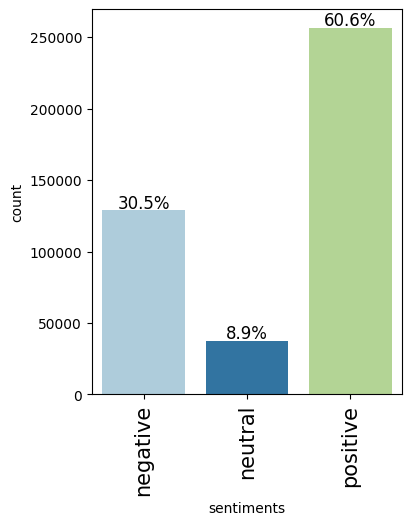

In [10]:
prep.labeled_barplot(data, "sentiments", perc=True)

### __WORDCLOUD for Negative, Positive and Neutral reviews Reviews__

In [11]:
all_sentiments =['negative', 'positive','neutral']

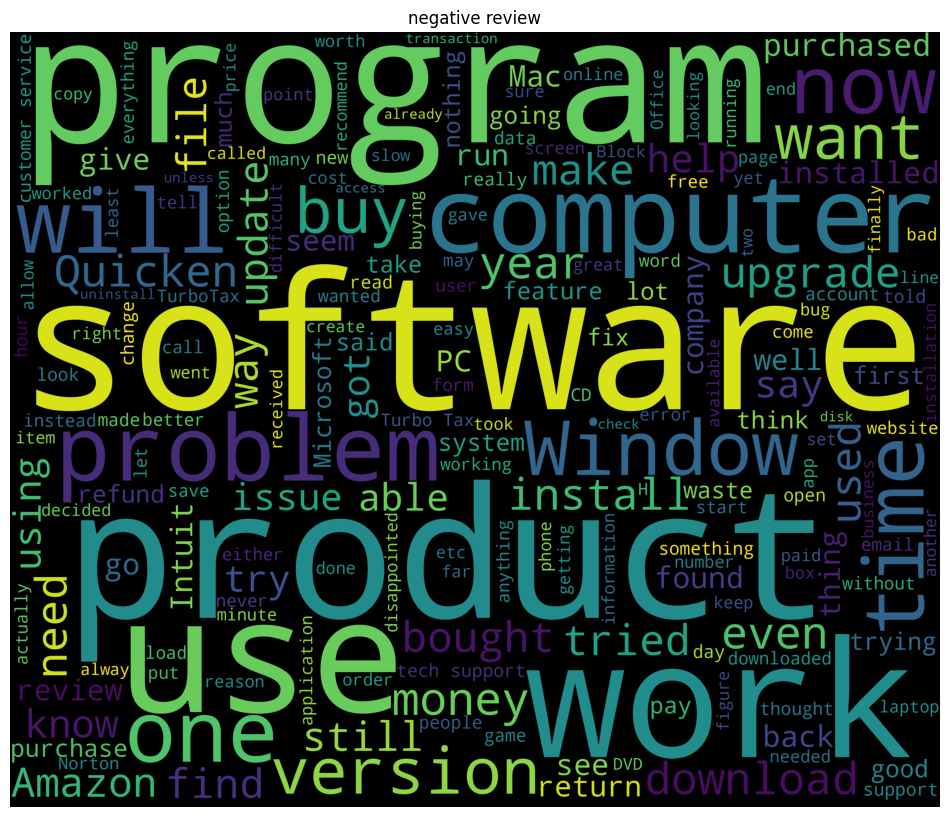

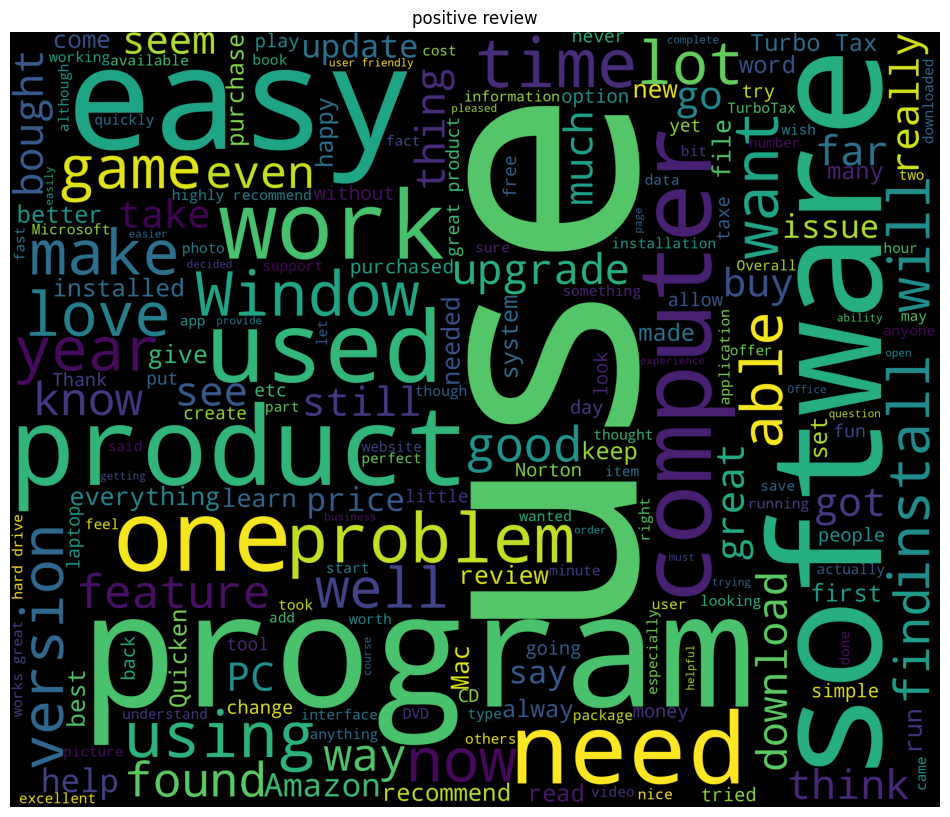

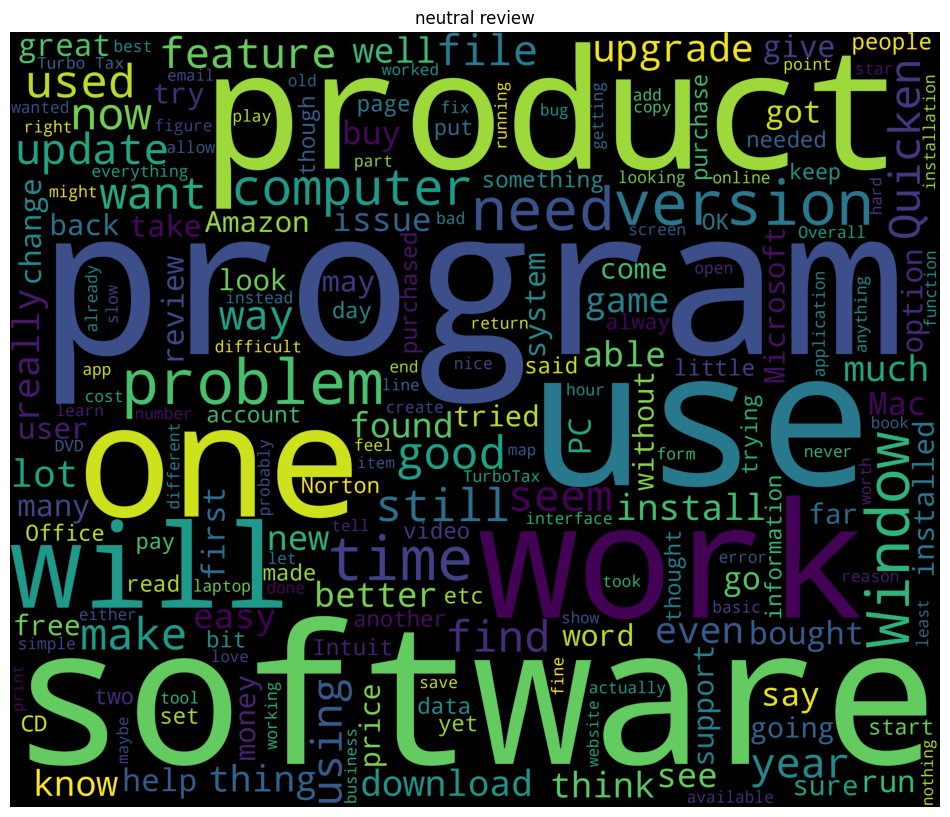

In [12]:
for x in all_sentiments:
  prep.generate_wordcloud(data, x)

We notice that:
- 60.6% of customers rated positive (4 or 5)
- 30.5% rated negative (1 or 2)
- 8.9% rated neutral (or 3)
- The word cloud shows the different words used by each group in their reviews

In [13]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()  

,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excellent condition. However for the money spent they really should've come with a binder and not just loose leaf.,Material Great,1394496000,positive
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,"I am really enjoying this book with the worksheets that make you review your goals, what to do when you do not make it, it reminds me of my human sexuality classwork.",Health,1393113600,positive
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR MONEY ON THIS SO CALLED BOOK! $140.00 FOR A ""BOOK"" THAT ISIN'T EVEN BOUND LOOSE LEAFS, THAT I HAD TO PROVIDE MY OWN BINDER FOR. TURNS OUT YOU CAN BUY ACCESS TO THE BOOK AT MCGRAW HILL CONNECT CORE FOR $70.00\n\nTHIS BOOK IS A COMPLETE WASTE OF MONEY!",ARE YOU KIDING ME?,1392595200,negative
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages. I couldn't answer some test questions because of it!! I have never had this happen before.,missing pages!!,1392595200,neutral
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,"I have used LearnSmart and can officially say that this is an amazing study tool that quickly and simply adapts to your style of learning. You can access it at anytime and it is on the go! Once you start using LearnSmart you will quickly realize that this is the best way to learn and study.\n\nI am a business student and I did not use LearnSmart for my Accounting I class, however, I did use it for my Accounting II class. The grade difference from Accounting I to Accounting II was a whole letter grade... thanks to LearnSmart!\n\nEvery college student should definitely check it out!",Best study product out there!,1381708800,positive


## __Data Processing:__
- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Removal of Special Characters and Punctuations.
- Conversion to lowercase.
- Remove numbers.
- Tokenization
- Remove Stopwords.
- Lemmatized data
- We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [14]:
#remove the html tags
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, 'html')                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    return text
 

In [15]:
#data cleaning
data['review'] = data['review'].apply(lambda x: clean_text(x)) #[nltk.word_tokenize(line) for line in x ]
data.head()

,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excellent condition. However for the money spent they really should have come with a binder and not just loose leaf.,Material Great,1394496000,positive
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,"I am really enjoying this book with the worksheets that make you review your goals, what to do when you do not make it, it reminds me of my human sexuality classwork.",Health,1393113600,positive
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR MONEY ON THIS SO CALLED BOOK! $. FOR A ""BOOK"" THAT ISIN'T EVEN BOUND LOOSE LEAFS, THAT I HAD TO PROVIDE MY OWN BINDER FOR. TURNS OUT YOU CAN BUY ACCESS TO THE BOOK AT MCGRAW HILL CONNECT CORE FOR $.\n\nTHIS BOOK IS A COMPLETE WASTE OF MONEY!",ARE YOU KIDING ME?,1392595200,negative
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages. I could not answer some test questions because of it!! I have never had this happen before.,missing pages!!,1392595200,neutral
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,"I have used LearnSmart and can officially say that this is an amazing study tool that quickly and simply adapts to your style of learning. You can access it at anytime and it is on the go! Once you start using LearnSmart you will quickly realize that this is the best way to learn and study.\n\nI am a business student and I did not use LearnSmart for my Accounting I class, however, I did use it for my Accounting II class. The grade difference from Accounting I to Accounting II was a whole letter grade... thanks to LearnSmart!\n\nEvery college student should definitely check it out!",Best study product out there!,1381708800,positive


After removing html tags, contractions and numbers, lett's get a value count of words in very text

In [16]:
#get the no of words in every text
data['word_count'] = [len(t.split()) for t in data.review]
data.head()


,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments,word_count
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excellent condition. However for the money spent they really should have come with a binder and not just loose leaf.,Material Great,1394496000,positive,27
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,"I am really enjoying this book with the worksheets that make you review your goals, what to do when you do not make it, it reminds me of my human sexuality classwork.",Health,1393113600,positive,32
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR MONEY ON THIS SO CALLED BOOK! $. FOR A ""BOOK"" THAT ISIN'T EVEN BOUND LOOSE LEAFS, THAT I HAD TO PROVIDE MY OWN BINDER FOR. TURNS OUT YOU CAN BUY ACCESS TO THE BOOK AT MCGRAW HILL CONNECT CORE FOR $.\n\nTHIS BOOK IS A COMPLETE WASTE OF MONEY!",ARE YOU KIDING ME?,1392595200,negative,58
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages. I could not answer some test questions because of it!! I have never had this happen before.,missing pages!!,1392595200,neutral,24
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,"I have used LearnSmart and can officially say that this is an amazing study tool that quickly and simply adapts to your style of learning. You can access it at anytime and it is on the go! Once you start using LearnSmart you will quickly realize that this is the best way to learn and study.\n\nI am a business student and I did not use LearnSmart for my Accounting I class, however, I did use it for my Accounting II class. The grade difference from Accounting I to Accounting II was a whole letter grade... thanks to LearnSmart!\n\nEvery college student should definitely check it out!",Best study product out there!,1381708800,positive,107


In [17]:
data['word_count'].describe()


count    423353.000000
mean         81.358242
std         124.687189
min           0.000000
25%          20.000000
50%          42.000000
75%          97.000000
max        5132.000000
Name: word_count, dtype: float64

<Axes: xlabel='word_count'>

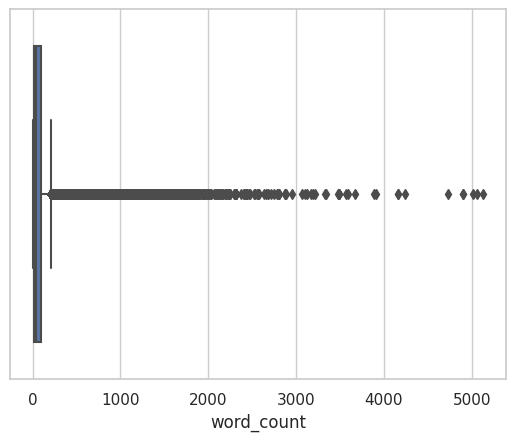

In [18]:
sns.set(style="whitegrid")
sns.boxplot(x=data['word_count'])

From the word count statistics, we can observe the following:
- The maximum word count is 5132 words
- 20 words lies in the 25th percentile
- The mean of 81 words
- The stard deviation of 124
- The median of 42 words
- 97 words lies in the 75th percentile
- The visualization shows that the word count is skewed to the right and contain a lot of outliers

With all these findings, let's create a new dataframe with a minimum word count of 20w ords and maximum of 150 words


In [19]:
mask = (data['word_count'] < 150) & (data['word_count'] >=20)
short_reviews = data[mask]
print('No of Short reviews')
print(len(short_reviews))

mask = data['word_count'] >= 150
long_reviews = data[mask]
print('No of Long reviews')
print(len(long_reviews))

No of Short reviews
259001
No of Long reviews
61088


In [20]:
short_reviews['review'] = short_reviews.apply(lambda row: nltk.word_tokenize(row['review']), axis=1) # Tokenization of data
short_reviews.head()

,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments,word_count
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,"[The, materials, arrived, early, and, were, in, excellent, condition, ., However, for, the, money, spent, they, really, should, have, come, with, a, binder, and, not, just, loose, leaf, .]",Material Great,1394496000,positive,27
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,"[I, am, really, enjoying, this, book, with, the, worksheets, that, make, you, review, your, goals, ,, what, to, do, when, you, do, not, make, it, ,, it, reminds, me, of, my, human, sexuality, classwork, .]",Health,1393113600,positive,32
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,"[IF, YOU, ARE, TAKING, THIS, CLASS, DON, '', T, WASTE, YOUR, MONEY, ON, THIS, SO, CALLED, BOOK, !, $, ., FOR, A, ``, BOOK, '', THAT, ISI, N'T, EVEN, BOUND, LOOSE, LEAFS, ,, THAT, I, HAD, TO, PROVIDE, MY, OWN, BINDER, FOR, ., TURNS, OUT, YOU, CAN, BUY, ACCESS, TO, THE, BOOK, AT, MCGRAW, HILL, CONNECT, CORE, FOR, $, ., THIS, BOOK, IS, A, COMPLETE, WASTE, OF, MONEY, !]",ARE YOU KIDING ME?,1392595200,negative,58
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,"[This, book, was, missing, pages, !, !, !, Important, pages, ., I, could, not, answer, some, test, questions, because, of, it, !, !, I, have, never, had, this, happen, before, .]",missing pages!!,1392595200,neutral,24
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,"[I, have, used, LearnSmart, and, can, officially, say, that, this, is, an, amazing, study, tool, that, quickly, and, simply, adapts, to, your, style, of, learning, ., You, can, access, it, at, anytime, and, it, is, on, the, go, !, Once, you, start, using, LearnSmart, you, will, quickly, realize, that, this, is, the, best, way, to, learn, and, study, ., I, am, a, business, student, and, I, did, not, use, LearnSmart, for, my, Accounting, I, class, ,, however, ,, I, did, use, it, for, my, Accounting, II, class, ., The, grade, difference, from, Accounting, I, to, Accounting, II, was, a, whole, ...]",Best study product out there!,1381708800,positive,107


Setting the custom list for for the stopwords . It is important to not that maintaining the words in this stop list is crucial in preserving the meaning of the review (positive/ negative). We wwill proceed to normalize the newly created dataframe by performing the followig:
- Removing non-ASCII characters
- Converting all characters to lowercase
- Removing the punctuations
- Removing the stop words
- lemmatizing the words

In [21]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [22]:
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

short_reviews['review'] = short_reviews.apply(lambda row: normalize(row['review']), axis=1)
short_reviews.head()

,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments,word_count
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,materials arrive early excellent condition however money spend really come binder not loose leaf,Material Great,1394496000,positive,27
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,really enjoy book worksheets make review goals not make remind human sexuality classwork,Health,1393113600,positive,32
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,take class waste money call book book isi nt even bind loose leaf provide binder turn buy access book mcgraw hill connect core book complete waste money,ARE YOU KIDING ME?,1392595200,negative,58
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,book miss page important page could not answer test question never happen,missing pages!!,1392595200,neutral,24
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,use learnsmart officially say amaze study tool quickly simply adapt style learn access anytime go start use learnsmart quickly realize best way learn study business student not use learnsmart account class however use account ii class grade difference account account ii whole letter grade thank learnsmart every college student definitely check,Best study product out there!,1381708800,positive,107


### __Categories of sentiment to use__

The focus will be on positive and negative reviews only. The neutral reviews will be dropped.  The bar plot of the newly cleaned data shows that 64.8% are positve review and 35.2% are negative reviews

In [23]:
review_data = short_reviews.copy()

In [24]:
review_data = review_data[(review_data['sentiments']=='negative') | (review_data['sentiments']== 'positive')]

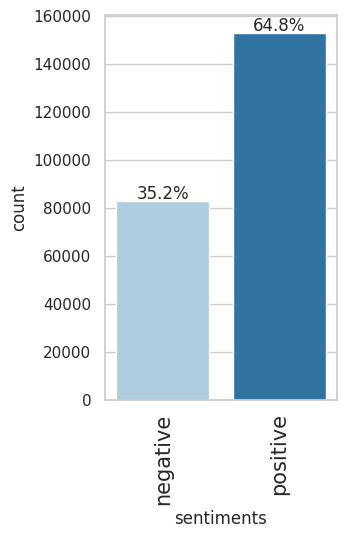

In [25]:
prep.labeled_barplot(review_data, "sentiments", perc=True)

In [26]:
# Replacing negative and positive with 0 and 1
review_data.sentiments = review_data.sentiments.replace(to_replace=['negative', 'positive'], value=[0, 1])

In [27]:
review_data.head()

,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments,word_count
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,materials arrive early excellent condition however money spend really come binder not loose leaf,Material Great,1394496000,1,27
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,really enjoy book worksheets make review goals not make remind human sexuality classwork,Health,1393113600,1,32
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,take class waste money call book book isi nt even bind loose leaf provide binder turn buy access book mcgraw hill connect core book complete waste money,ARE YOU KIDING ME?,1392595200,0,58
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,use learnsmart officially say amaze study tool quickly simply adapt style learn access anytime go start use learnsmart quickly realize best way learn study business student not use learnsmart account class however use account ii class grade difference account account ii whole letter grade thank learnsmart every college student definitely check,Best study product out there!,1381708800,1,107
5,4.0,True,"08 15, 2011",AGN3T5ERYJN5A,0132147556,strong backgroung good read quite date take holistic approach subject lack reference bite surprise jorge,E-marketing 6th ed,1313366400,1,24


## Saving a copy of the cleaned dataset

In [28]:
#word count

In [29]:
#clean
cleaned_data = review_data[['review','sentiments']]
cleaned_df = cleaned_data.to_csv('cleaned_amazon_review.csv')

In [30]:
# counting unique wword for the vocabulary size

def counter_word(text_col):
  count = Counter()
  for text in text_col.values:
    for word in text.split():
      count[word] += 1
  return count


counter = counter_word(review_data.review)

In [31]:
len(counter)

78419

In [32]:
counter.most_common(10)

[('not', 221537),
 ('use', 143585),
 ('work', 78392),
 ('software', 76319),
 ('get', 73545),
 ('product', 72430),
 ('program', 69316),
 ('would', 52424),
 ('version', 49369),
 ('buy', 47948)]

In [33]:
vocab_size = len(counter)

By applying the counter function above to extrat unoque words, we notice that our vocabulary size is 78419. However, to avoid having a complex model , the max_feature (vocab_size will be set to 50,000). The 10 most common words were also printed above.

### __SPLIT THE DATA INTO TRAIN AND TEST SETS__

In [34]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [35]:
train, validate, test = train_validate_test_split(review_data,target='sentiments')

In [36]:
#training set
X_train =train.review.tolist()
y_train = train.sentiments.tolist()

#validate set
X_validate =train.review.tolist()
y_validate = train.sentiments.tolist()

#test set 
X_test =train.review.tolist()
y_test = train.sentiments.tolist()

# Tokenization


In [37]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))


[[12513, 1, 30126, 30125]]


In [38]:
# Setting up the split after tokenization
train_sequences = np.array( tokenizer.texts_to_sequences(X_train) )
valid_sequences = np.array( tokenizer.texts_to_sequences(X_validate))
test_sequences  = np.array( tokenizer.texts_to_sequences(X_test) )

In [39]:
train_padded = pad_sequences(train_sequences, padding='post', maxlen=150)
valid_padded = pad_sequences(valid_sequences, padding='post', maxlen=150)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=150)

### Example of a Padded sequence

In [40]:
# Example of a padded sequence
train_padded[70]

array([    3,     7,   228,   603,    17,     2,    45,   265,    15,
         144,  1692,    20,  1200,    13, 24136,    13,   571,   104,
         134,    89,   639,  1412,   131,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [41]:
train_labels = np.asarray(y_train )
valid_labels = np.asarray( y_validate)
test_labels = np.asarray(y_test)

In [42]:
train_ds = tf.data.Dataset.from_tensor_slices((train_padded,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((valid_padded,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_padded,test_labels))

## __Part III: Network Architecture__

The network  architecture has a total of 2,035,553 parameters, and below is the breakdown of each layer:
-	**Embedding layer:** This layer converts each word in the input text to a vector representation, called word embedding. It takes the sequence of words as input and returns a sequence of vectors, where each vector represents a word in the sequence (Cho et al., 2014). It has a shape of 150 for the sequence max length and 16 for the embedding dimension, and 800,016 parameters.
- **Dropout Layer:** This layer randomly drops out some of the input units, which helps to prevent overfitting. 
- 	**LSTM Layer:** This type of recurrent neural network (RNN) is particularly good at capturing dependencies and relationships between words in a sequence. It takes the sequence of word embeddings as input and returns a sequence of hidden states, each containing information about the current and previous words (Cho et al., 2014). The LSTM layer has 2,112 parameters.
-	**Flatten Layer:** This layer flattens the output of the LSTM layer so that it can be passed to the next layer, which is a fully connected layer. The Flatten layer in a neural network converts the previous layer's multidimensional output into a one-dimensional vector that can be fed into the next layer. In this case, the Flatten layer has an output shape of (None, 2400), which means that it will take in an input tensor of shape (None, 150, 16) (from the LSTM layer) and flatten it to a shape of (None, 2400) (150 x 16 = 2400). The Flatten layer has 0 parameters because it doesn't perform any calculations or transformations on the input data. It just reshapes it (Cho et al., 2014).
- **Dense Layer:** This layer is a fully connected neural network layer that takes the flattened output of the LSTM layer as input and applies a linear transformation followed by a non-linear activation function. This layer is responsible for learning the features that will be used to make predictions. The output shape of this layer is (None, 512), which means that the layer produces an output of shape (batch_size, 512), where the batch size can vary and is represented by None (Cho et al., 2014). The number 512 indicates the number of neurons in the layer, and 1,229,312 is the number of parameters.
-	**Output Layer:** This layer is dense with a single unit and a sigmoid activation function. It takes the output of the previous layer as input. It returns a value between 0 and 1, representing the predicted probability that the input text belongs to the positive class.


In [43]:
max_features =50000
embedding_dim =16
sequence_length = 150

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

### Output of the model summary  from TensorFlow

In [44]:
model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 16)           800016    
                                                                 
 dropout (Dropout)           (None, 150, 16)           0         
                                                                 
 lstm (LSTM)                 (None, 150, 16)           2112      
                                                                 
 flatten (Flatten)           (None, 2400)              0         
                                                                 
 dense (Dense)               (None, 512)               1229312   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4

## __Part IV: Model Evaluation__

In [45]:
epochs = 25
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/25
129/129 [==============================] - 155s 1s/step - loss: 1.0861 - binary_accuracy: 0.7978 - val_loss: 0.4237 - val_binary_accuracy: 0.8917
Epoch 2/25
129/129 [==============================] - 172s 1s/step - loss: 0.4720 - binary_accuracy: 0.8671 - val_loss: 0.3871 - val_binary_accuracy: 0.8945
Epoch 3/25
 51/129 [==========>...................] - ETA: 1:14 - loss: 0.4485 - binary_accuracy: 0.8690

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification on train and validate')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.plot(history.history['binary_accuracy'], label=' training data')
plt.plot(history.history['val_binary_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification on train and validate')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

### Early stopping to prevent overfitting

In [ ]:
#Importing classback API
from keras import callbacks 

# Early stopping to prevent overfitting of our model
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

# Running model again
model2 = model.fit(train_ds.shuffle(5000).batch(1024), epochs=25, validation_data=valid_ds.batch(1024),
                    verbose=1, callbacks = [earlystopping])

### Code used to save the trained network 

In [ ]:
# code to save the neural network
model2.save('my_lstm_model.h5')
json_string= tokenizer.to_json(()

### Visualizations of the model’s training process

In [ ]:
final_model = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= 11 ,
                    validation_data=test_ds.batch(1024),
                    verbose=1)

In [ ]:
plt.plot(final_model.history['loss'], label=' training data')
plt.plot(final_model.history['val_loss'], label='Test data')
plt.title('Loss for Text Classification on train and test')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.plot(final_model.history['binary_accuracy'], label=' training data')
plt.plot(final_model.history['val_binary_accuracy'], label='Test data')
plt.title('Accuracy for Text Classification on train and test')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

## __Part V : Summary and Recommendations__

The final training process of this neural network has been carried out for 11 epochs. In terms of training accuracy, the model achieved a binary accuracy of 87.1% at the beginning of the training, and slight improvement is seen in the training accuracy over time. On the other hand, the validation (test set) accuracy started at 90.14% and reached 90.17% in the final epoch. Regarding the loss function, the training loss began at 0.3880 and decreased gradually in the first three epochs, then increased in the following epochs with some fluctuations, finally reaching 0.4027 in the last epoch. The validation loss started at 0.3082, decreased gradually in the first three epochs, then fluctuated between 0.30 and 0.33 for the remaining epochs.

   Based on these results, the model's accuracy indicates that our stakeholders can trust it. Based on the prediction results of our model, they may use this to estimate consumer sentiment more accurately. The business can determine how customers evaluate a product based on the wording of a review and take appropriate action depending on the prediction. The model's forecast can be integrated into a comprehensive customer retention plan to help minimize losses or improve product designs. The business might also determine whether a consumer dislikes a product and follow up with that customer to address the issue and influence their opinion.
